# Описательная статистика найденного датасета

Disney Plus Movies and TV Shows

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("disney_plus_shows.csv", index_col='imdb_id')

In [3]:
df.shape  #размер датафрейма

(992, 18)

In [4]:
cols = list(df.columns)
#cols.remove('Unnamed: 0')
cols

['title',
 'plot',
 'type',
 'rated',
 'year',
 'released_at',
 'added_at',
 'runtime',
 'genre',
 'director',
 'writer',
 'actors',
 'language',
 'country',
 'awards',
 'metascore',
 'imdb_rating',
 'imdb_votes']

In [5]:
df.isnull().sum()

title           98
plot           126
type            98
rated          250
year            98
released_at    118
added_at         0
runtime        154
genre          107
director       303
writer         249
actors         122
language       127
country        123
awards         436
metascore      700
imdb_rating    113
imdb_votes     113
dtype: int64

In [6]:
df_new = df.dropna(thresh=3)

In [7]:
df_new.isnull().sum()  #количество пустых ячеек 

title            0
plot            28
type             0
rated          152
year             0
released_at     20
added_at         0
runtime         56
genre            9
director       205
writer         151
actors          24
language        29
country         25
awards         338
metascore      602
imdb_rating     15
imdb_votes      15
dtype: int64

In [8]:
pd.options.display.float_format = '{:,.1f}'.format

In [9]:
df_new['rated'] = df_new['rated'].str.replace('Approved','APPROVED')
df_new['rated'] = df_new['rated'].str.replace('nan','UNRATED')
df_new['rated'] = df_new['rated'].str.replace('Not Rated','UNRATED')
df_new['rated'] = df_new['rated'].str.replace('Unrated','UNRATED')
df_new['rated'] = df_new['rated'].str.replace('Passed','PASSED')
df_new['rated'] = df_new['rated'].str.replace('NOT RATED','UNRATED')

<ipython-input-9-389758fdd2bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['rated'] = df_new['rated'].str.replace('Approved','APPROVED')
<ipython-input-9-389758fdd2bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['rated'] = df_new['rated'].str.replace('nan','UNRATED')
<ipython-input-9-389758fdd2bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [10]:
df_new['imdb_votes'] = df_new['imdb_votes'].str.replace(',','')
df_new['imdb_votes'] = df_new['imdb_votes'].astype(float)

<ipython-input-10-ca3839905c8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['imdb_votes'] = df_new['imdb_votes'].str.replace(',','')
<ipython-input-10-ca3839905c8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['imdb_votes'] = df_new['imdb_votes'].astype(float)


In [11]:
nom_cols_data = [{name: df_new[col].to_list().count(name) for name in df_new[col].unique()}
                for col in cols
                if df_new[col].dtype == "object"]

Числовые значения сейчас присутствуют только в двух столбцах (рейтинги согласно Metacritic и IMDb)

In [12]:
metascore_stat = {"min": df_new["metascore"].min(),
                  "max": df_new["metascore"].max(),
                  "mean": df_new["metascore"].mean(),
                  "median": df_new["metascore"].median(),
                  "mode": df_new["metascore"].mode().to_list(),
                  "var": df_new["metascore"].var(ddof=0),
                  "std": df_new["metascore"].std(ddof=0),
                  "range": df_new["metascore"].max() - df_new["metascore"].min(),
                  "interquartile_range": df_new["metascore"].quantile(0.75) - df_new["metascore"].quantile(0.25),
                  "skew": df_new["metascore"].skew()
                 }

In [13]:
metascore_stat

{'min': 19.0,
 'max': 99.0,
 'mean': 62.06164383561644,
 'median': 61.0,
 'mode': [74.0],
 'var': 248.04414524300995,
 'std': 15.749417298522824,
 'range': 80.0,
 'interquartile_range': 22.0,
 'skew': 0.04503836668972144}

In [14]:
imdb_rating_stat = {"min": df_new["imdb_rating"].min(),
                  "max": df_new["imdb_rating"].max(),
                  "mean": df_new["imdb_rating"].mean(),
                  "median": df_new["imdb_rating"].median(),
                  "mode": df_new["imdb_rating"].mode().to_list(),
                  "var": df_new["imdb_rating"].var(ddof=0),
                  "std": df_new["imdb_rating"].std(ddof=0),
                  "range": df_new["imdb_rating"].max() - df_new["imdb_rating"].min(),
                  "interquartile_range": df_new["imdb_rating"].quantile(0.75) - df_new["imdb_rating"].quantile(0.25),
                  "skew": df_new["imdb_rating"].skew()
                 }

In [15]:
imdb_rating_stat

{'min': 1.5,
 'max': 9.7,
 'mean': 6.656427758816838,
 'median': 6.7,
 'mode': [7.1],
 'var': 1.039933086646968,
 'std': 1.0197710952203773,
 'range': 8.2,
 'interquartile_range': 1.3000000000000007,
 'skew': -0.5895726517970485}

In [16]:
movie_df = df_new.loc[df_new["type"] == "movie"]  #датафрейм с фильмами
m_num = movie_df.shape[0]
m_persent = m_num / df_new.shape[0] * 100
print(m_num, m_persent, sep='\n')
movie_df.head()

680
76.0626398210291


,title,plot,type,rated,year,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
imdb_id,,,,,,,,,,,,,,,,,,
tt0147800,10 Things I Hate About You,"A pretty, popular teenager can't go out on a d...",movie,PG-13,1999,31 Mar 1999,"November 12, 2019",97 min,"Comedy, Drama, Romance",Gil Junger,"Karen McCullah, Kirsten Smith","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","English, French",USA,2 wins & 13 nominations.,70.0,7.3,"283,945.0"
tt0115433,101 Dalmatians,An evil high-fashion designer plots to steal D...,movie,G,1996,27 Nov 1996,"November 12, 2019",103 min,"Adventure, Comedy, Crime, Family",Stephen Herek,"Dodie Smith (novel), John Hughes (screenplay)","Glenn Close, Jeff Daniels, Joely Richardson, J...","English, Spanish","USA, UK",Nominated for 1 Golden Globe. Another 3 wins &...,49.0,5.7,"97,785.0"
tt0324941,101 Dalmatians 2: Patch's London Adventure,"Being one of 101 takes its toll on Patch, who ...",movie,G,2002,21 Jan 2003,"November 12, 2019",74 min,"Animation, Adventure, Comedy, Family, Musical","Jim Kammerud, Brian Smith","Jim Kammerud (story), Dan Root (story), Garret...","Barry Bostwick, Jason Alexander, Martin Short,...",English,USA,5 wins & 10 nominations.,NaN,5.8,"7,434.0"
tt0211181,102 Dalmatians,Cruella DeVil gets out of prison and goes afte...,movie,G,2000,22 Nov 2000,"November 12, 2019",100 min,"Adventure, Comedy, Family",Kevin Lima,"Dodie Smith (novel), Kristen Buckley (story), ...","Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...",English,"USA, UK",Nominated for 1 Oscar. Another 1 win & 7 nomin...,35.0,4.9,"33,444.0"
tt1846442,12 Dates of Christmas,"A story that follows Kate, a young woman who a...",movie,PG,2011,11 Dec 2011,"November 12, 2019",90 min,"Comedy, Fantasy, Romance",James Hayman,"Aaron Mendelsohn (teleplay), Janet Brownell (t...","Laura Miyata, Vijay Mehta, Amy Smart, Audrey D...",English,USA,1 nomination.,NaN,6.3,"4,933.0"


In [17]:
series_df = df_new.loc[df_new["type"] == "series"]  #датафрейм с сериалами
s_num = series_df.shape[0]
s_persent = s_num / df_new.shape[0] * 100
print(s_num, s_persent, sep='\n')
series_df.head()

191
21.364653243847876


,title,plot,type,rated,year,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
imdb_id,,,,,,,,,,,,,,,,,,
tt7019028,101 Dalmatian Street,This series follows the lives of Delilah and D...,series,NaN,2018–,25 Mar 2019,"February 28, 2020",NaN,"Animation, Comedy, Family",NaN,NaN,"Josh Brener, Michaela Dietz, Bert Davis, Abiga...",English,"UK, USA, Canada",NaN,NaN,6.2,124.0
tt0098740,America's Funniest Home Videos,Viewers from around America send in home video...,series,TV-PG,1989–,26 Nov 1989,"April 24, 2020",30 min,"Comedy, Family, Reality-TV",NaN,NaN,"Jess Harnell, Tom Bergeron, Bob Saget, Ernie A...",English,USA,4 wins & 6 nominations.,NaN,6.2,"4,652.0"
tt4622802,America's National Parks,Series exploring the incredible wildlife of Am...,series,TV-G,2015–,06 Dec 2015,"January 15, 2020",NaN,Documentary,NaN,NaN,NaN,English,USA,NaN,NaN,7.9,73.0
tt5195114,Andi Mack,A contemporary coming-of-age story about a gir...,series,TV-G,2017–2019,10 Mar 2017,"November 12, 2019",25 min,"Comedy, Family",NaN,Terri Minsky,"Peyton Elizabeth Lee, Joshua Rush, Sofia Wylie...",English,USA,3 wins & 6 nominations.,NaN,7.3,"1,723.0"
tt1830491,Austin & Ally,"Following the lives of Austin, an aspiring con...",series,TV-G,2011–2016,02 Dec 2011,"January 1, 2020",30 min,"Comedy, Family, Music",NaN,"Kevin Kopelow, Heath Seifert","Ross Lynch, Laura Marano, Raini Rodriguez, Cal...",English,USA,10 wins & 14 nominations.,NaN,5.9,"8,666.0"


Круговая диаграмма распределения фильмов и сериалов на сервисе Disney+

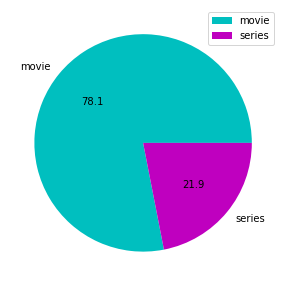

In [18]:
type_pie = pd.DataFrame({"": [m_num, s_num]},
                       index=["movie", "series"])
type_pie.plot.pie(y="",
                 colors=["c", "m"],
                 autopct="%.1f",
                 fontsize=10,
                 figsize=(5, 5));

In [19]:
q1_m = movie_df["imdb_rating"].quantile(0.25)
q2_m = movie_df["imdb_rating"].quantile(0.5)
q3_m = movie_df["imdb_rating"].quantile(0.75)

In [20]:
df_inter_m = movie_df.query("@q1_m <= imdb_rating <= @q3_m")
inter_imdb_rating_m = pd.DataFrame.from_dict(data={imdb_rating: df_inter_m["imdb_rating"].to_list().count(imdb_rating) for imdb_rating in set(df_inter_m["imdb_rating"])},
                                   orient="index", 
                                   columns=["imdb_rating"]).sort_index()

Количество фильмов в группах с определенными оценками согласно IMDb

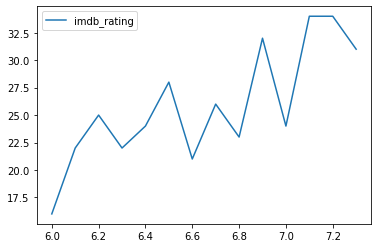

In [21]:
inter_imdb_rating_m.plot()

In [22]:
q1_s = series_df["imdb_rating"].quantile(0.25)
q2_s = series_df["imdb_rating"].quantile(0.5)
q3_s = series_df["imdb_rating"].quantile(0.75)

In [23]:
df_inter_s = series_df.query("@q1_s <= imdb_rating <= @q3_s")
inter_imdb_rating_s = pd.DataFrame.from_dict(data={imdb_rating: df_inter_s["imdb_rating"].to_list().count(imdb_rating) for imdb_rating in set(df_inter_s["imdb_rating"])},
                                   orient="index", 
                                   columns=["imdb_rating"]).sort_index()

Количество сериалов в группах с определенными оценками согласно IMDb

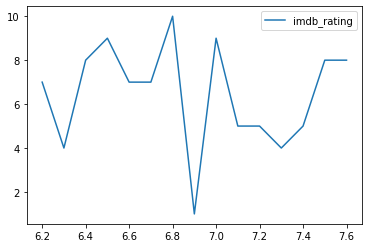

In [24]:
inter_imdb_rating_s.plot()

In [25]:
index_m = ["[%d;%d)" %(round(imdb_rating_stat["min"]), round(q1_m)), 
         "[%d;%d)" %(round(q1_m), round(q3_m)), 
         "[%d;%d]" %(round(q3_m), round(imdb_rating_stat["max"]))]

index_m

['[2;6)', '[6;7)', '[7;10]']

In [26]:
index_s = ["[%d;%d)" %(round(imdb_rating_stat["min"]), round(q1_s)), 
         "[%d;%d)" %(round(q1_s), round(q3_s)), 
         "[%d;%d]" %(round(q3_s), round(imdb_rating_stat["max"]))]

index_s

['[2;6)', '[6;8)', '[8;10]']

In [27]:
m_imdb = [movie_df.query("imdb_rating < @q1_m").shape[0] / movie_df.shape[0] * 100, 
         movie_df.query("@q1_m <= imdb_rating < @q3_m").shape[0] / movie_df.shape[0] * 100,
         movie_df.query("imdb_rating >= @q3_m").shape[0] / movie_df.shape[0] * 100]

s_imdb = [series_df.query("imdb_rating < @q1_s").shape[0] / series_df.shape[0] * 100, 
         series_df.query("@q1_s <= imdb_rating < @q3_s").shape[0] / series_df.shape[0] * 100,
         series_df.query("imdb_rating >= @q3_s").shape[0] / series_df.shape[0] * 100]

Количество фильмов и сериалов в разных группах оценок (в процентном соотношении)

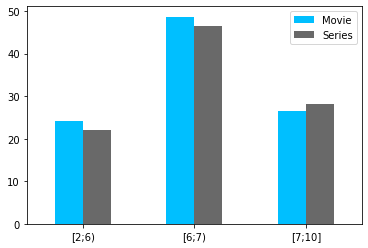

In [28]:
s_or_m = pd.DataFrame({"Movie": m_imdb, "Series": s_imdb}, index=index_m)
s_or_m.plot.bar(color=["deepskyblue", "dimgrey"],
                       rot=0);

In [29]:
language_data = {name: movie_df["language"].to_list().count(name) for name in movie_df["language"].unique()}

In [30]:
rated_data = {name: df_new["rated"].to_list().count(name) for name in df_new["rated"].unique()}
rated_data

{'PG-13': 37,
 nan: 152,
 'G': 207,
 'PG': 155,
 'APPROVED': 60,
 'TV-G': 132,
 'UNRATED': 22,
 'TV-PG': 41,
 'TV-Y7': 41,
 'TV-Y': 34,
 'PASSED': 6,
 'TV-14': 4,
 'TV-Y7-FV': 3}

In [31]:
df_new = df_new.fillna({'rated':'UNRATED'})

In [32]:
df_new.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 894 entries, tt0147800 to tt2948356
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        894 non-null    object 
 1   plot         866 non-null    object 
 2   type         894 non-null    object 
 3   rated        894 non-null    object 
 4   year         894 non-null    object 
 5   released_at  874 non-null    object 
 6   added_at     894 non-null    object 
 7   runtime      838 non-null    object 
 8   genre        885 non-null    object 
 9   director     689 non-null    object 
 10  writer       743 non-null    object 
 11  actors       870 non-null    object 
 12  language     865 non-null    object 
 13  country      869 non-null    object 
 14  awards       556 non-null    object 
 15  metascore    292 non-null    float64
 16  imdb_rating  879 non-null    float64
 17  imdb_votes   879 non-null    float64
dtypes: float64(3), object(15)
memory usage: 7

In [33]:
df_new.describe()

,metascore,imdb_rating,imdb_votes
count,292.0,879.0,879.0
mean,62.1,6.7,"62,547.2"
std,15.8,1.0,"172,117.2"
min,19.0,1.5,5.0
25%,51.0,6.1,695.0
50%,61.0,6.7,"3,952.0"
75%,73.0,7.4,"24,223.0"
max,99.0,9.7,"1,225,316.0"


In [34]:
df_new.head()

,title,plot,type,rated,year,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
imdb_id,,,,,,,,,,,,,,,,,,
tt0147800,10 Things I Hate About You,"A pretty, popular teenager can't go out on a d...",movie,PG-13,1999,31 Mar 1999,"November 12, 2019",97 min,"Comedy, Drama, Romance",Gil Junger,"Karen McCullah, Kirsten Smith","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","English, French",USA,2 wins & 13 nominations.,70.0,7.3,"283,945.0"
tt7019028,101 Dalmatian Street,This series follows the lives of Delilah and D...,series,UNRATED,2018–,25 Mar 2019,"February 28, 2020",NaN,"Animation, Comedy, Family",NaN,NaN,"Josh Brener, Michaela Dietz, Bert Davis, Abiga...",English,"UK, USA, Canada",NaN,NaN,6.2,124.0
tt0115433,101 Dalmatians,An evil high-fashion designer plots to steal D...,movie,G,1996,27 Nov 1996,"November 12, 2019",103 min,"Adventure, Comedy, Crime, Family",Stephen Herek,"Dodie Smith (novel), John Hughes (screenplay)","Glenn Close, Jeff Daniels, Joely Richardson, J...","English, Spanish","USA, UK",Nominated for 1 Golden Globe. Another 3 wins &...,49.0,5.7,"97,785.0"
tt0324941,101 Dalmatians 2: Patch's London Adventure,"Being one of 101 takes its toll on Patch, who ...",movie,G,2002,21 Jan 2003,"November 12, 2019",74 min,"Animation, Adventure, Comedy, Family, Musical","Jim Kammerud, Brian Smith","Jim Kammerud (story), Dan Root (story), Garret...","Barry Bostwick, Jason Alexander, Martin Short,...",English,USA,5 wins & 10 nominations.,NaN,5.8,"7,434.0"
tt0211181,102 Dalmatians,Cruella DeVil gets out of prison and goes afte...,movie,G,2000,22 Nov 2000,"November 12, 2019",100 min,"Adventure, Comedy, Family",Kevin Lima,"Dodie Smith (novel), Kristen Buckley (story), ...","Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...",English,"USA, UK",Nominated for 1 Oscar. Another 1 win & 7 nomin...,35.0,4.9,"33,444.0"


In [35]:
df_new = df_new.dropna(axis=0, subset=['imdb_votes'])

In [36]:
df_new.isnull().sum()

title            0
plot            20
type             0
rated            0
year             0
released_at     15
added_at         0
runtime         48
genre            4
director       195
writer         140
actors          16
language        21
country         18
awards         323
metascore      587
imdb_rating      0
imdb_votes       0
dtype: int64

In [37]:
from operator import itemgetter

rated_data = [(name, df_new["rated"].to_list().count(name)) 
                  for name in df_new["rated"].unique() 
                  if df_new["rated"].to_list().count(name) > 10]
rated_data = sorted(rated_data, key=itemgetter(1))
rated_data

[('TV-Y', 34),
 ('PG-13', 37),
 ('TV-PG', 41),
 ('TV-Y7', 41),
 ('APPROVED', 60),
 ('TV-G', 132),
 ('PG', 155),
 ('UNRATED', 160),
 ('G', 207)]

In [38]:
rated_data_opt = [i for i in rated_data if "UNRATED" != i[0]]
rated_data_opt

[('TV-Y', 34),
 ('PG-13', 37),
 ('TV-PG', 41),
 ('TV-Y7', 41),
 ('APPROVED', 60),
 ('TV-G', 132),
 ('PG', 155),
 ('G', 207)]

In [39]:
ratings = []
rated_count = []

for rating, rated_count_num in rated_data:
  ratings.append(rating)
  rated_count.append(rated_count_num)
    
    
ratings_opt = []
rated_count_opt = []

for rating, rated_count_num in rated_data_opt:
  ratings_opt.append(rating)
  rated_count_opt.append(rated_count_num)


ratings_df = pd.DataFrame({"rating": ratings,"number":rated_count})
ratings_df_opt = pd.DataFrame({"rating": ratings_opt,"number":rated_count_opt})

Количество шоу по рейтингам

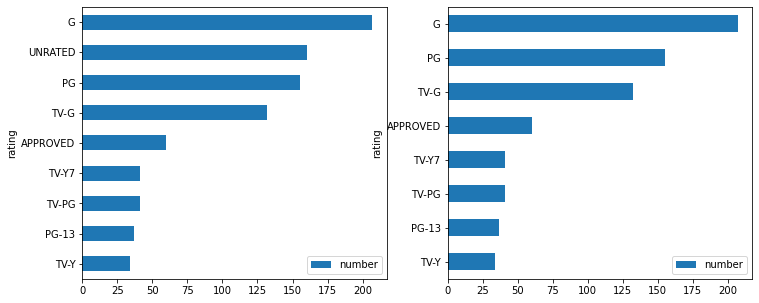

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ratings_df.plot.barh(ax=axes[0], x="rating", y="number", figsize=(12, 5));
ratings_df_opt.plot.barh(ax=axes[1], x="rating", y="number", figsize=(12, 5));

In [41]:
rating_data_type = [(name,
                   df_new["rated"].to_list().count(name),
                   df_new.query("type == 'movie'")["rated"].to_list().count(name),
                   df_new.query("type == 'series'")["rated"].to_list().count(name)) 
                  for name in df_new["rated"].unique() 
                  if df_new["rated"].to_list().count(name) > 0]

rating_data_type = sorted(rating_data_type, key=itemgetter(1))
rating_type_df = pd.DataFrame.from_records(rating_data_type, 
                                         columns=["Rating", "Total", "movie", "series"])
rating_type_df

,Rating,Total,movie,series
0,TV-Y7-FV,2,1,1
1,TV-14,4,1,3
2,PASSED,6,6,0
3,TV-Y,34,0,34
4,PG-13,37,37,0
5,TV-PG,41,23,17
6,TV-Y7,41,3,38
7,APPROVED,60,60,0
8,TV-G,132,89,40
9,PG,155,155,0


In [42]:
rating_type_df_opt = rating_type_df[(rating_type_df["Rating"] != "UNRATED")]
rating_type_df_opt

,Rating,Total,movie,series
0,TV-Y7-FV,2,1,1
1,TV-14,4,1,3
2,PASSED,6,6,0
3,TV-Y,34,0,34
4,PG-13,37,37,0
5,TV-PG,41,23,17
6,TV-Y7,41,3,38
7,APPROVED,60,60,0
8,TV-G,132,89,40
9,PG,155,155,0


In [43]:
df_draw = pd.DataFrame({"movie": rating_type_df["movie"].to_list(),
                        "series": rating_type_df["series"].to_list()},
                       index=rating_type_df["Rating"].to_list())
df_draw_opt = pd.DataFrame({"movie": rating_type_df_opt["movie"].to_list(),
                        "series": rating_type_df_opt["series"].to_list()},
                       index=rating_type_df_opt["Rating"].to_list())

Количество шоу по рейтингам с распределением на фильмы и сериалы

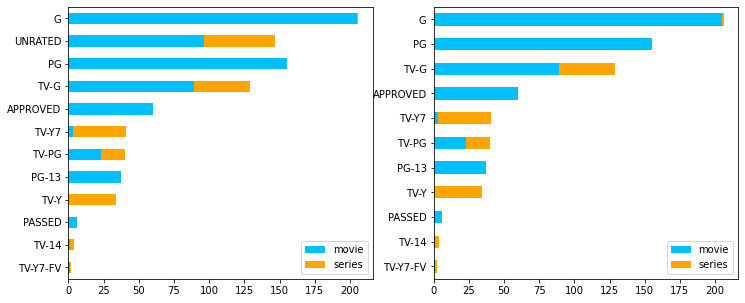

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2)
df_draw.plot.barh(ax=axes[0],
                  color=["deepskyblue", "orange"],
                  stacked=True,
                  figsize=(12, 5));
df_draw_opt.plot.barh(ax=axes[1],
                      color=["deepskyblue", "orange"],
                      stacked=True,
                      figsize=(12, 5));

In [45]:
movie_df['year'] = movie_df['year'].astype(int)

In [46]:
q1_y = movie_df["year"].quantile(0.25)
q2_y = movie_df["year"].quantile(0.5)
q3_y = movie_df["year"].quantile(0.75)

In [47]:
df_year_m = movie_df.query("@q1_y <=year")
inter_year_m = pd.DataFrame.from_dict(data={year: df_year_m["year"].to_list().count(year) for year in set(df_year_m["year"])},
                                   orient="index", 
                                   columns=["year"]).sort_index()

Количество выпущенных фильмов за определенные года

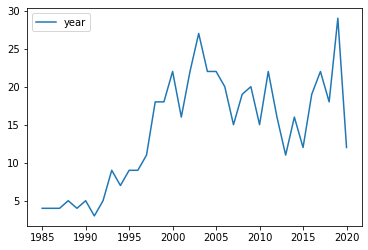

In [48]:
inter_year_m.plot()

In [49]:
movie_df['runtime'] = movie_df['runtime'].str.replace('min','')
movie_df = movie_df.dropna(axis=0, subset=['runtime'])
movie_df['runtime'] = movie_df['runtime'].astype(int)

Зависимость продолжительности фильма от года его выхода

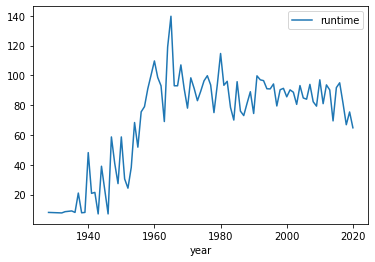

In [55]:
m_lenght = movie_df.pivot_table(index='year', values='runtime')
m_lenght.reset_index().plot.line('year','runtime')
plt.show()

In [51]:
runtime_data = {name: movie_df["runtime"].to_list().count(name) for name in movie_df["runtime"].unique()}

In [52]:
movie_df.describe()

,year,runtime,metascore,imdb_rating,imdb_votes
count,662.0,662.0,291.0,660.0,660.0
mean,"1,993.2",78.4,62.1,6.6,"81,019.9"
std,24.3,37.5,15.8,1.0,"194,610.1"
min,"1,928.0",3.0,19.0,1.5,6.0
25%,"1,984.0",70.2,51.0,6.0,"1,288.5"
50%,"2,002.0",88.0,61.0,6.7,"6,254.5"
75%,"2,010.0",100.0,73.0,7.3,"42,955.5"
max,"2,020.0",181.0,99.0,8.7,"1,225,316.0"


Зависимость рейтинга от продолжительности фильма

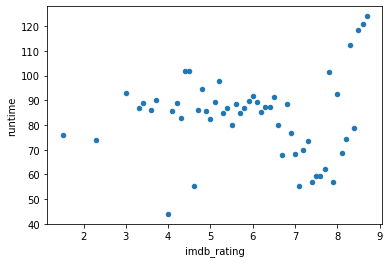

In [60]:
m_lenghts = movie_df.pivot_table(index='imdb_rating', values='runtime')
m_lenghts.reset_index().plot.scatter('imdb_rating','runtime')
plt.show()

Зависимость рейтинга от количества проголосовавших

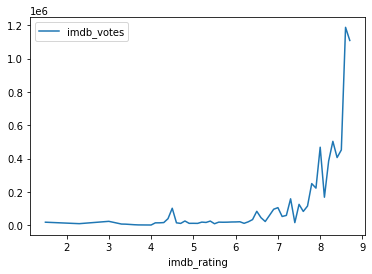

In [57]:
m_imdb = movie_df.pivot_table(index='imdb_rating', values='imdb_votes')
m_imdb.reset_index().plot.line('imdb_rating','imdb_votes')
plt.show()